In [1]:
import numpy as np
import pandas as pd
from data_handler import DataHandler
from embed_bins import BinEmbedder
from merge_bins import BinMerger

In [2]:
%matplotlib inline

In [3]:
hr_data = pd.read_csv('data/HR_comma_sep.csv')
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [4]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary', 'number_project','time_spend_company'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'],
    class_var = 'left'
)

In [5]:
def split_data(data, val_ratio=0.3):
    idxs = np.arange(0, len(data))
    np.random.shuffle(idxs)
    val_size = int(len(data) * val_ratio)
    train_data = data.iloc[idxs[val_size:]].reset_index(drop=True)
    val_data = data.iloc[idxs[:val_size]].reset_index(drop=True)
    return train_data, val_data

In [6]:
train_data, val_data = split_data(hr_data)

In [7]:
data_handler = DataHandler(train_data, var_dict)
dummy_coded_data = data_handler.get_dummy_coded_data()

In [8]:
dummy_coded_data.shape

(10500, 91)

In [21]:
bin_embedder = BinEmbedder()
bin_embedder.learn_bin_embeddings(dummy_coded_data, data_handler.n_variables, 
                                  max_iter=300000)

>>> Iteration = 10000, Loss = 0.21308846771717072
>>> Iteration = 20000, Loss = 0.2169685810804367
>>> Iteration = 30000, Loss = 0.2148706167936325
>>> Iteration = 40000, Loss = 0.21361187100410461
>>> Iteration = 50000, Loss = 0.21475322544574738
>>> Iteration = 60000, Loss = 0.21613377332687378
>>> Iteration = 70000, Loss = 0.21537111699581146
>>> Iteration = 80000, Loss = 0.21483634412288666
>>> Iteration = 90000, Loss = 0.21092930436134338
>>> Iteration = 100000, Loss = 0.21674677729606628
>>> Iteration = 110000, Loss = 0.21290500462055206
>>> Iteration = 120000, Loss = 0.20838502049446106
>>> Iteration = 130000, Loss = 0.21337123215198517
>>> Iteration = 140000, Loss = 0.21613915264606476
>>> Iteration = 150000, Loss = 0.2138858139514923
>>> Iteration = 160000, Loss = 0.21471084654331207
>>> Iteration = 170000, Loss = 0.21302883327007294
>>> Iteration = 180000, Loss = 0.213908851146698
>>> Iteration = 190000, Loss = 0.21409596502780914
>>> Iteration = 200000, Loss = 0.212394982576

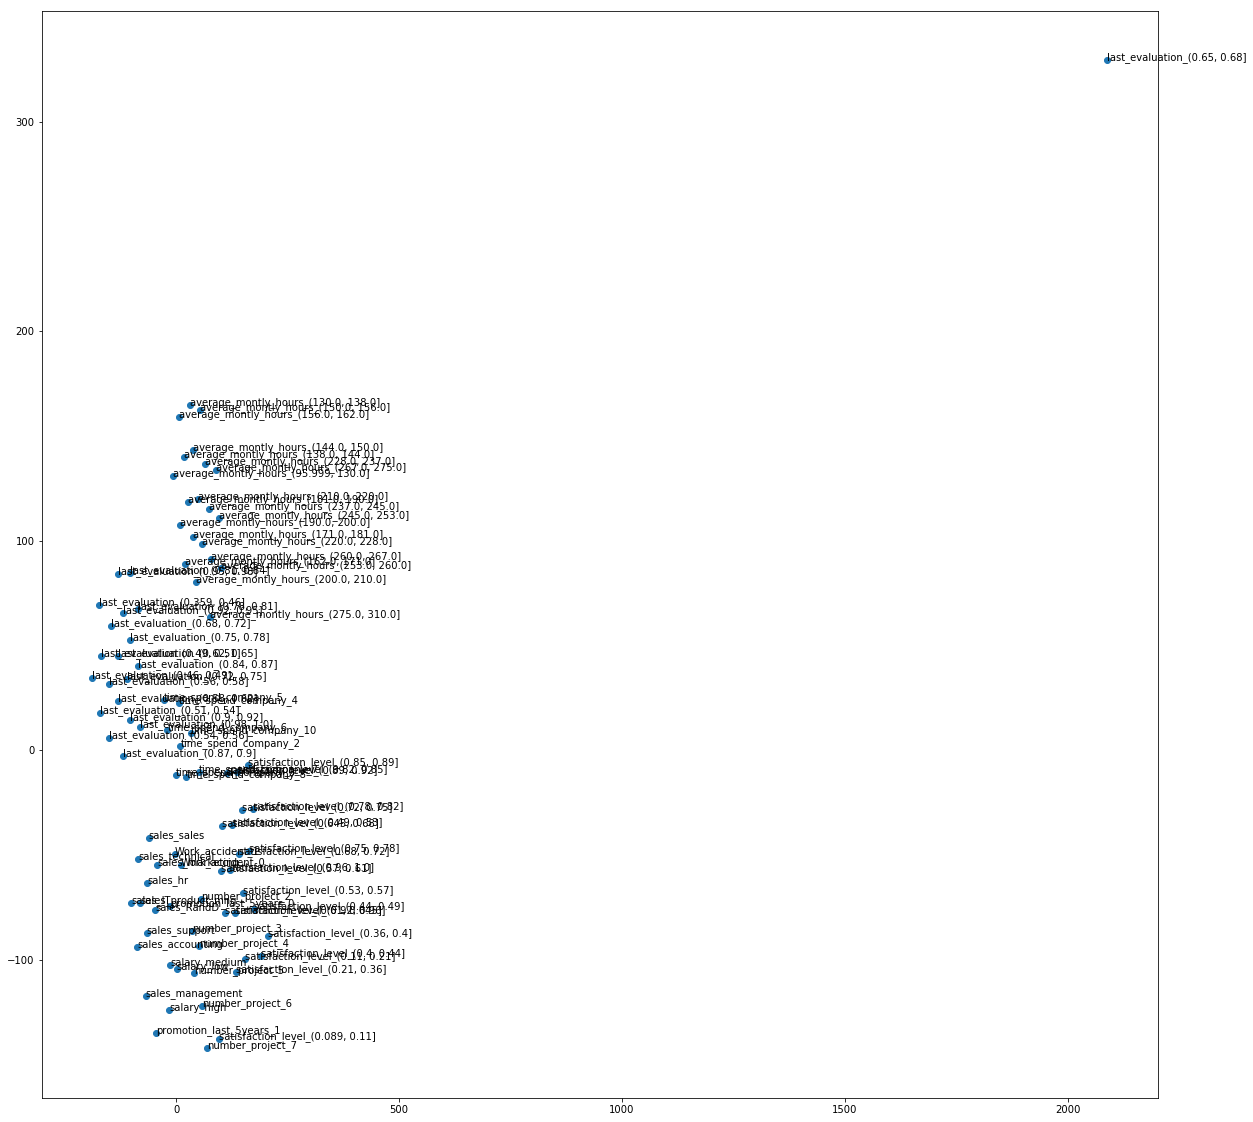

In [22]:
bin_embedder.visualize_embeddings()

In [23]:
bin_merger = BinMerger(bin_embedder.embedding_by_column)
bins_by_var = bin_merger.get_merged_bins_by_var(var_dict)

In [24]:
bins_by_var

{'Work_accident': {'merged_bins': ['0', '1']},
 'average_montly_hours': {'merged_bins': ['(130.0, 162.0]',
   '(162.0, 237.0]',
   '(237.0, 275.0]',
   '(275.0, 310.0]',
   '(95.999, 130.0]'],
  'split_point': [95.999, 130.0, 162.0, 237.0, 275.0, 310.0]},
 'last_evaluation': {'merged_bins': ['(0.359, 0.46]',
   '(0.46, 0.58]',
   '(0.58, 0.75]',
   '(0.75, 0.98]',
   '(0.98, 1.0]'],
  'split_point': [0.359, 0.46, 0.58, 0.75, 0.98, 1.0]},
 'number_project': {'merged_bins': ['2 <OR> 3 <OR> 4 <OR> 5 <OR> 6', '7']},
 'promotion_last_5years': {'merged_bins': ['0', '1']},
 'salary': {'merged_bins': ['high', 'low <OR> medium']},
 'sales': {'merged_bins': ['IT <OR> RandD <OR> accounting <OR> hr <OR> marketing <OR> product_mng <OR> sales <OR> support <OR> technical',
   'management']},
 'satisfaction_level': {'merged_bins': ['(0.089, 0.11]', '(0.11, 1.0]'],
  'split_point': [0.089, 0.11, 1.0]},
 'time_spend_company': {'merged_bins': ['10 <OR> 2 <OR> 3 <OR> 4 <OR> 5 <OR> 6 <OR> 8',
   '7']}}

In [25]:
data_handler2 = DataHandler(val_data, var_dict)
semantically_binned_data = data_handler2.get_dummy_coded_data(bins_by_variable=bins_by_var)

In [26]:
data_handler2.categorical_vars.columns

Index(['Work_accident', 'promotion_last_5years', 'sales', 'salary',
       'number_project', 'time_spend_company'],
      dtype='object')

In [27]:
semantically_binned_data.columns

Index(['Work_accident_0', 'Work_accident_1', 'promotion_last_5years_0',
       'promotion_last_5years_1', 'sales_management', 'salary_high',
       'number_project_7', 'time_spend_company_7',
       'IT <OR> RandD <OR> accounting <OR> hr <OR> marketing <OR> product_mng <OR> sales <OR> support <OR> technical',
       'low <OR> medium', '2 <OR> 3 <OR> 4 <OR> 5 <OR> 6',
       '10 <OR> 2 <OR> 3 <OR> 4 <OR> 5 <OR> 6 <OR> 8',
       'satisfaction_level_(0.089, 0.11]', 'satisfaction_level_(0.11, 1.0]',
       'last_evaluation_(0.359, 0.46]', 'last_evaluation_(0.46, 0.58]',
       'last_evaluation_(0.58, 0.75]', 'last_evaluation_(0.75, 0.98]',
       'last_evaluation_(0.98, 1.0]', 'average_montly_hours_(95.999, 130.0]',
       'average_montly_hours_(130.0, 162.0]',
       'average_montly_hours_(162.0, 237.0]',
       'average_montly_hours_(237.0, 275.0]',
       'average_montly_hours_(275.0, 310.0]'],
      dtype='object')

In [28]:
semantically_binned_data.shape

(4499, 24)

In [29]:
data_handler3 = DataHandler(train_data, var_dict)

In [ ]:
equal_freq_binned_data = data_handler3.get_dummy_coded_data()

#### Equal Freq, Width로  train에 대해 구간을 구하고, 이걸 따와서 validation의 구간을 나눠야함

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

cv_score = cross_val_score(LogisticRegression(), X=dummy_coded_data, y=train_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
cv_score = cross_val_score(LogisticRegression(), X=semantically_binned_data, y=val_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
print('')

cv_score = cross_val_score(BernoulliNB(), X=dummy_coded_data, y=train_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
cv_score = cross_val_score(BernoulliNB(), X=semantically_binned_data, y=val_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
print('')

cv_score = cross_val_score(DecisionTreeClassifier(), X=dummy_coded_data, y=train_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
cv_score = cross_val_score(DecisionTreeClassifier(), X=semantically_binned_data, y=val_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
print('')

equal width로 잘라서, 비어 있는 구간이 발생. 임베딩 및 클러스터링 시 문제가 될 수 있음

구간이 노이지한것이 클러스터링 알고리즘 자체의 노이지 함 때문이라면 앙상블 클러스터링으로 해결 가능

그것이 아니라면, 클러스터링이 아니라 인접 구간부터 묶어 나가는 방식의 접근 필요

Binning이 유의미하게 되었는지를 판단하려면, Train data만 보고 구간을 잘라야 함

제대로 안되면 검증 데이터에서 성능 차이가 나야 함

In [20]:
# def find_nn(query, candidates, k=10, exclude_self=False):
#     embedding_of_query = embedding_by_column[query]
#     distances = dict()
#     for col, embedding in embedding_by_column.items():
#         distances[col] = np.linalg.norm(embedding - embedding_of_query)
#     knn = sorted(distances.items(), key=lambda x: x[1])
#     if exclude_self:
#         knn = knn[1:]
#     return knn[:k]

# find_nn('average_montly_hours_(150.0, 156.0]', embedding_by_column, k=10)